In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

pd.options.display.max_columns = 200

import statsmodels.formula.api as smf
import statsmodels.api as sm

/Users/Brandon/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
match_df = pd.read_csv("results.csv")
match_df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [5]:
match_df["date"] = pd.to_datetime(match_df["date"])
match_df["month"] = match_df["date"].dt.month
match_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [6]:
match_df["months_since_1872"] = (match_df["date"]-pd.Timestamp("1872-11-30"))/(pd.Timedelta(1,"M"))
match_df["months_since_1872"]

0           0.000000
1           3.219779
2          15.178956
3          27.138134
4          39.097312
5          39.787265
6          51.056490
7          51.122200
8          63.015668
9          63.705620
10         73.594940
11         76.124766
12         76.190476
13         87.393992
14         87.459701
15         87.853960
16         98.893201
17         99.353169
18         99.418879
19        110.622395
20        110.852379
21        111.312347
22        111.378057
23        111.772316
24        122.121604
25        122.811557
26        123.271525
27        123.337235
28        123.501509
29        133.850798
            ...     
39642    1746.795622
39643    1746.828477
39644    1746.828477
39645    1746.828477
39646    1746.828477
39647    1746.861332
39648    1746.861332
39649    1746.861332
39650    1746.861332
39651    1746.894187
39652    1746.894187
39653    1746.894187
39654    1746.894187
39655    1746.959897
39656    1746.959897
39657    1746.992751
39658    1746

In [8]:
avg_home_goal = pd.Series(match_df["home_score"].values,index=match_df["date"])
avg_home_goal

date
1872-11-30    0
1873-03-08    4
1874-03-07    2
1875-03-06    2
1876-03-04    3
1876-03-25    4
1877-03-03    1
1877-03-05    0
1878-03-02    7
1878-03-23    9
1879-01-18    2
1879-04-05    5
1879-04-07    0
1880-03-13    5
1880-03-15    2
1880-03-27    5
1881-02-26    0
1881-03-12    1
1881-03-14    1
1882-02-18    0
1882-02-25    7
1882-03-11    5
1882-03-13    5
1882-03-25    5
1883-02-03    5
1883-02-24    7
1883-03-10    2
1883-03-12    0
1883-03-17    1
1884-01-26    0
             ..
2018-06-25    1
2018-06-26    0
2018-06-26    0
2018-06-26    1
2018-06-26    1
2018-06-27    2
2018-06-27    0
2018-06-27    0
2018-06-27    2
2018-06-28    0
2018-06-28    0
2018-06-28    1
2018-06-28    0
2018-06-30    4
2018-06-30    2
2018-07-01    1
2018-07-01    1
2018-07-02    2
2018-07-02    3
2018-07-03    1
2018-07-03    1
2018-07-05    1
2018-07-06    0
2018-07-06    1
2018-07-07    0
2018-07-07    2
2018-07-10    1
2018-07-11    2
2018-07-14    2
2018-07-15    4
Length: 39672, dtyp

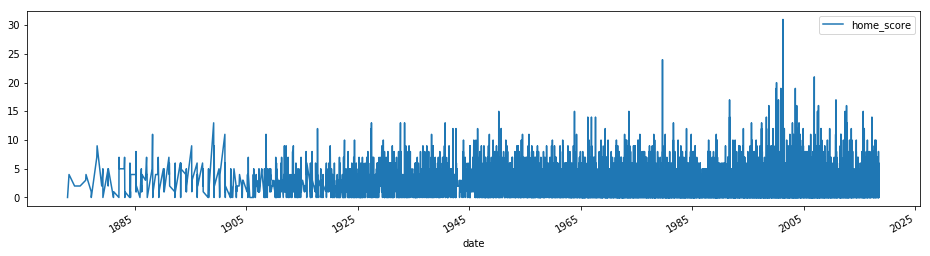

In [9]:
match_df.plot(x="date",y="home_score",figsize=(16,4))

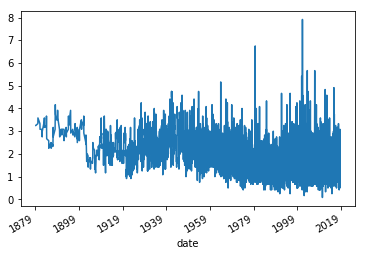

In [10]:
avg_home_goal.rolling(12).mean().plot()

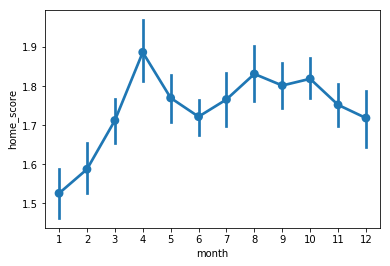

In [11]:
sb.pointplot(x="month",y="home_score",data=match_df)

In [12]:
avg_away_goal = pd.Series(match_df["away_score"].values,index=match_df["date"])
avg_away_goal

date
1872-11-30     0
1873-03-08     2
1874-03-07     1
1875-03-06     2
1876-03-04     0
1876-03-25     0
1877-03-03     3
1877-03-05     2
1878-03-02     2
1878-03-23     0
1879-01-18     1
1879-04-05     4
1879-04-07     3
1880-03-13     4
1880-03-15     3
1880-03-27     1
1881-02-26     1
1881-03-12     6
1881-03-14     5
1882-02-18    13
1882-02-25     1
1882-03-11     1
1882-03-13     3
1882-03-25     0
1883-02-03     0
1883-02-24     0
1883-03-10     3
1883-03-12     3
1883-03-17     1
1884-01-26     5
              ..
2018-06-25     1
2018-06-26     2
2018-06-26     0
2018-06-26     2
2018-06-26     2
2018-06-27     0
2018-06-27     3
2018-06-27     2
2018-06-27     2
2018-06-28     1
2018-06-28     1
2018-06-28     2
2018-06-28     1
2018-06-30     3
2018-06-30     1
2018-07-01     1
2018-07-01     1
2018-07-02     0
2018-07-02     2
2018-07-03     0
2018-07-03     1
2018-07-05     0
2018-07-06     2
2018-07-06     2
2018-07-07     2
2018-07-07     2
2018-07-10     0
2018-07-1

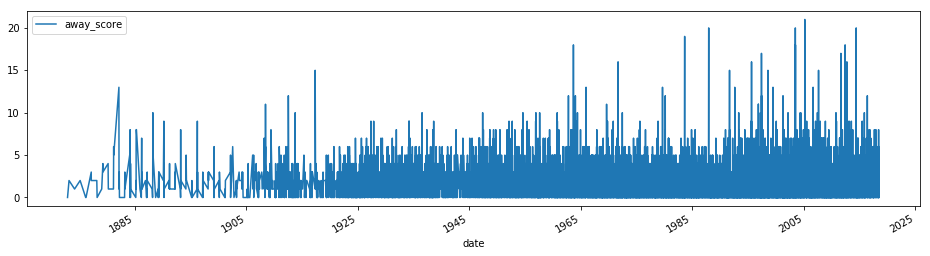

In [13]:
match_df.plot(x="date",y="away_score",figsize=(16,4))

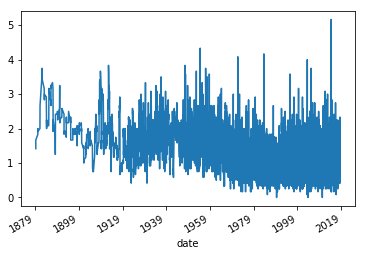

In [14]:
avg_away_goal.rolling(12).mean().plot()

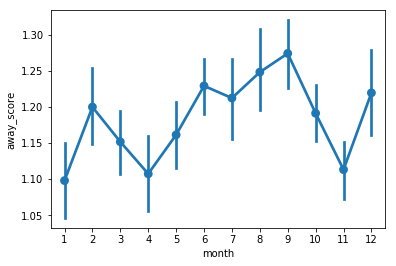

In [15]:
sb.pointplot(x="month",y="away_score",data=match_df)